# Inference

In [2]:
# imports
import torch
import json
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# paths 
ZERO_PATH = '../models/e-net-iteration_0/EfficientNETB2'
ONE_PATH = '../models/e-net-iteration_1/EfficientNETB2'

In [5]:
# load logging ZERO
with open(os.path.join(ZERO_PATH, 'EfficientNETB2.json')) as file:
    zero_data = file.read()
    file.close()
    
zero_obj = json.loads(zero_data)
print(zero_obj.keys())

dict_keys(['model', 'optim', 'loss', 'scheduler', 'train_samples', 'val_samples', 'device', 'train_pcent', 'TRAIN_BS', 'VALID_BS', 'NB_EPOCHS', 'model_name', 'reshape_size', 'num_classes', 'seed', 'val_fold', 'save_path', 'data', 'final_train_loss', 'final_val_loss'])


In [6]:
# load logging ZERO
with open(os.path.join(ONE_PATH, 'EfficientNETB2.json')) as file:
    one_data = file.read()
    file.close()
    
one_obj = json.loads(one_data)
print(one_obj.keys())

dict_keys(['model', 'optim', 'loss', 'scheduler', 'train_samples', 'val_samples', 'device', 'train_pcent', 'TRAIN_BS', 'VALID_BS', 'NB_EPOCHS', 'model_name', 'reshape_size', 'num_classes', 'seed', 'val_fold', 'save_path', 'data', 'final_train_loss', 'final_val_loss'])


In [7]:
zero_models = []
one_models = []

for i in tqdm(range(zero_obj['NB_EPOCHS'])):
    model = torch.load(os.path.join(ZERO_PATH, 'epoch_{}.pth'.format(i)), 
               map_location=torch.device('cpu'))
    zero_models.append(model)

for i in tqdm(range(one_obj['NB_EPOCHS'])):
    model = torch.load(os.path.join(ONE_PATH, 'epoch_{}.pth'.format(i)), 
               map_location=torch.device('cpu'))
    one_models.append(model)

100%|██████████| 7/7 [00:00<00:00, 12.53it/s]


# Helper Functions

In [11]:
def print_setup(obj):
    for k, v in obj.items():
        if k == 'data':
            continue
        print(f'{k}: {v}')

In [22]:
def model_epochs_dataframe(model_list):
    data = {
        # model
        'epoch': [],
        'train_loss': [],
        'val_loss': [],
        # optmiser
        'lr': [],
        'momentum': [],
        'dampening': [],
        'weight_decay': [],
        # scheduler
        'step_size': [],
        'step_count': [],
        'gamma': [],  
    }

    for i in range(len(model_list)):
        # temporary storage
        temp = model_list[i]
        temp_optimiser = temp['optimizer_state_dict']['param_groups'][0]
        temp_scheduler = temp['scheduler_state_dict']
        # append data
        data['epoch'].append(temp['epoch'])
        data['train_loss'].append(temp['train_loss'])
        data['val_loss'].append(temp['val_loss'])
        data['lr'].append(temp_optimiser['lr'])
        data['momentum'].append(temp_optimiser['momentum'])
        data['dampening'].append(temp_optimiser['dampening'])
        data['weight_decay'].append(temp_optimiser['weight_decay'])
        data['step_size'].append(temp_scheduler['step_size'])
        data['step_count'].append(temp_scheduler['_step_count'])
        data['gamma'].append(temp_scheduler['gamma'])

    return(pd.DataFrame(data))

# Iteration 0

In [23]:
print_setup(zero_obj)

model: EfficientNETB2
optim: SGD
loss: Cross Entropy
scheduler: StepLR
train_samples: 4874
val_samples: 1218
device: GeForce GTX 970
train_pcent: 0.8
TRAIN_BS: 1
VALID_BS: 1
NB_EPOCHS: 7
model_name: EfficientNETB2
reshape_size: [800, 800]
num_classes: 4
seed: 69
val_fold: 4
save_path: C:\Users\Admin\Git\SIIM\models\EfficientNETB2\
final_train_loss: 1.0943298648506292
final_val_loss: 1.2413050484383243


In [24]:
print('Keys for loaded model: {}'.format(zero_models[0].keys()))
print('*'*50)
print('Keys for optimiser: {}'.format(zero_models[0]['optimizer_state_dict'].keys()))
print('*'*50)
print('Keys for scheduler" {}'.format(zero_models[0]['scheduler_state_dict'].keys()))

Keys for loaded model: dict_keys(['model_state_dict', 'optimizer_state_dict', 'scheduler_state_dict', 'train_loss', 'val_loss', 'epoch'])
**************************************************
Keys for optimiser: dict_keys(['state', 'param_groups'])
**************************************************
Keys for scheduler" dict_keys(['step_size', 'gamma', 'base_lrs', 'last_epoch', '_step_count', 'verbose', '_get_lr_called_within_step', '_last_lr'])


In [25]:
# load df
zero_df = model_epochs_dataframe(zero_models)
zero_df.head()

,epoch,train_loss,val_loss,lr,momentum,dampening,weight_decay,step_size,step_count,gamma
0,0,1.245680,1.336400,0.0050,0.9,0,0.0005,4,2,0.1
1,1,1.175217,1.462304,0.0050,0.9,0,0.0005,4,3,0.1
2,2,1.146715,1.327028,0.0050,0.9,0,0.0005,4,4,0.1
3,3,1.137912,1.565080,0.0005,0.9,0,0.0005,4,5,0.1
4,4,1.105331,1.245046,0.0005,0.9,0,0.0005,4,6,0.1


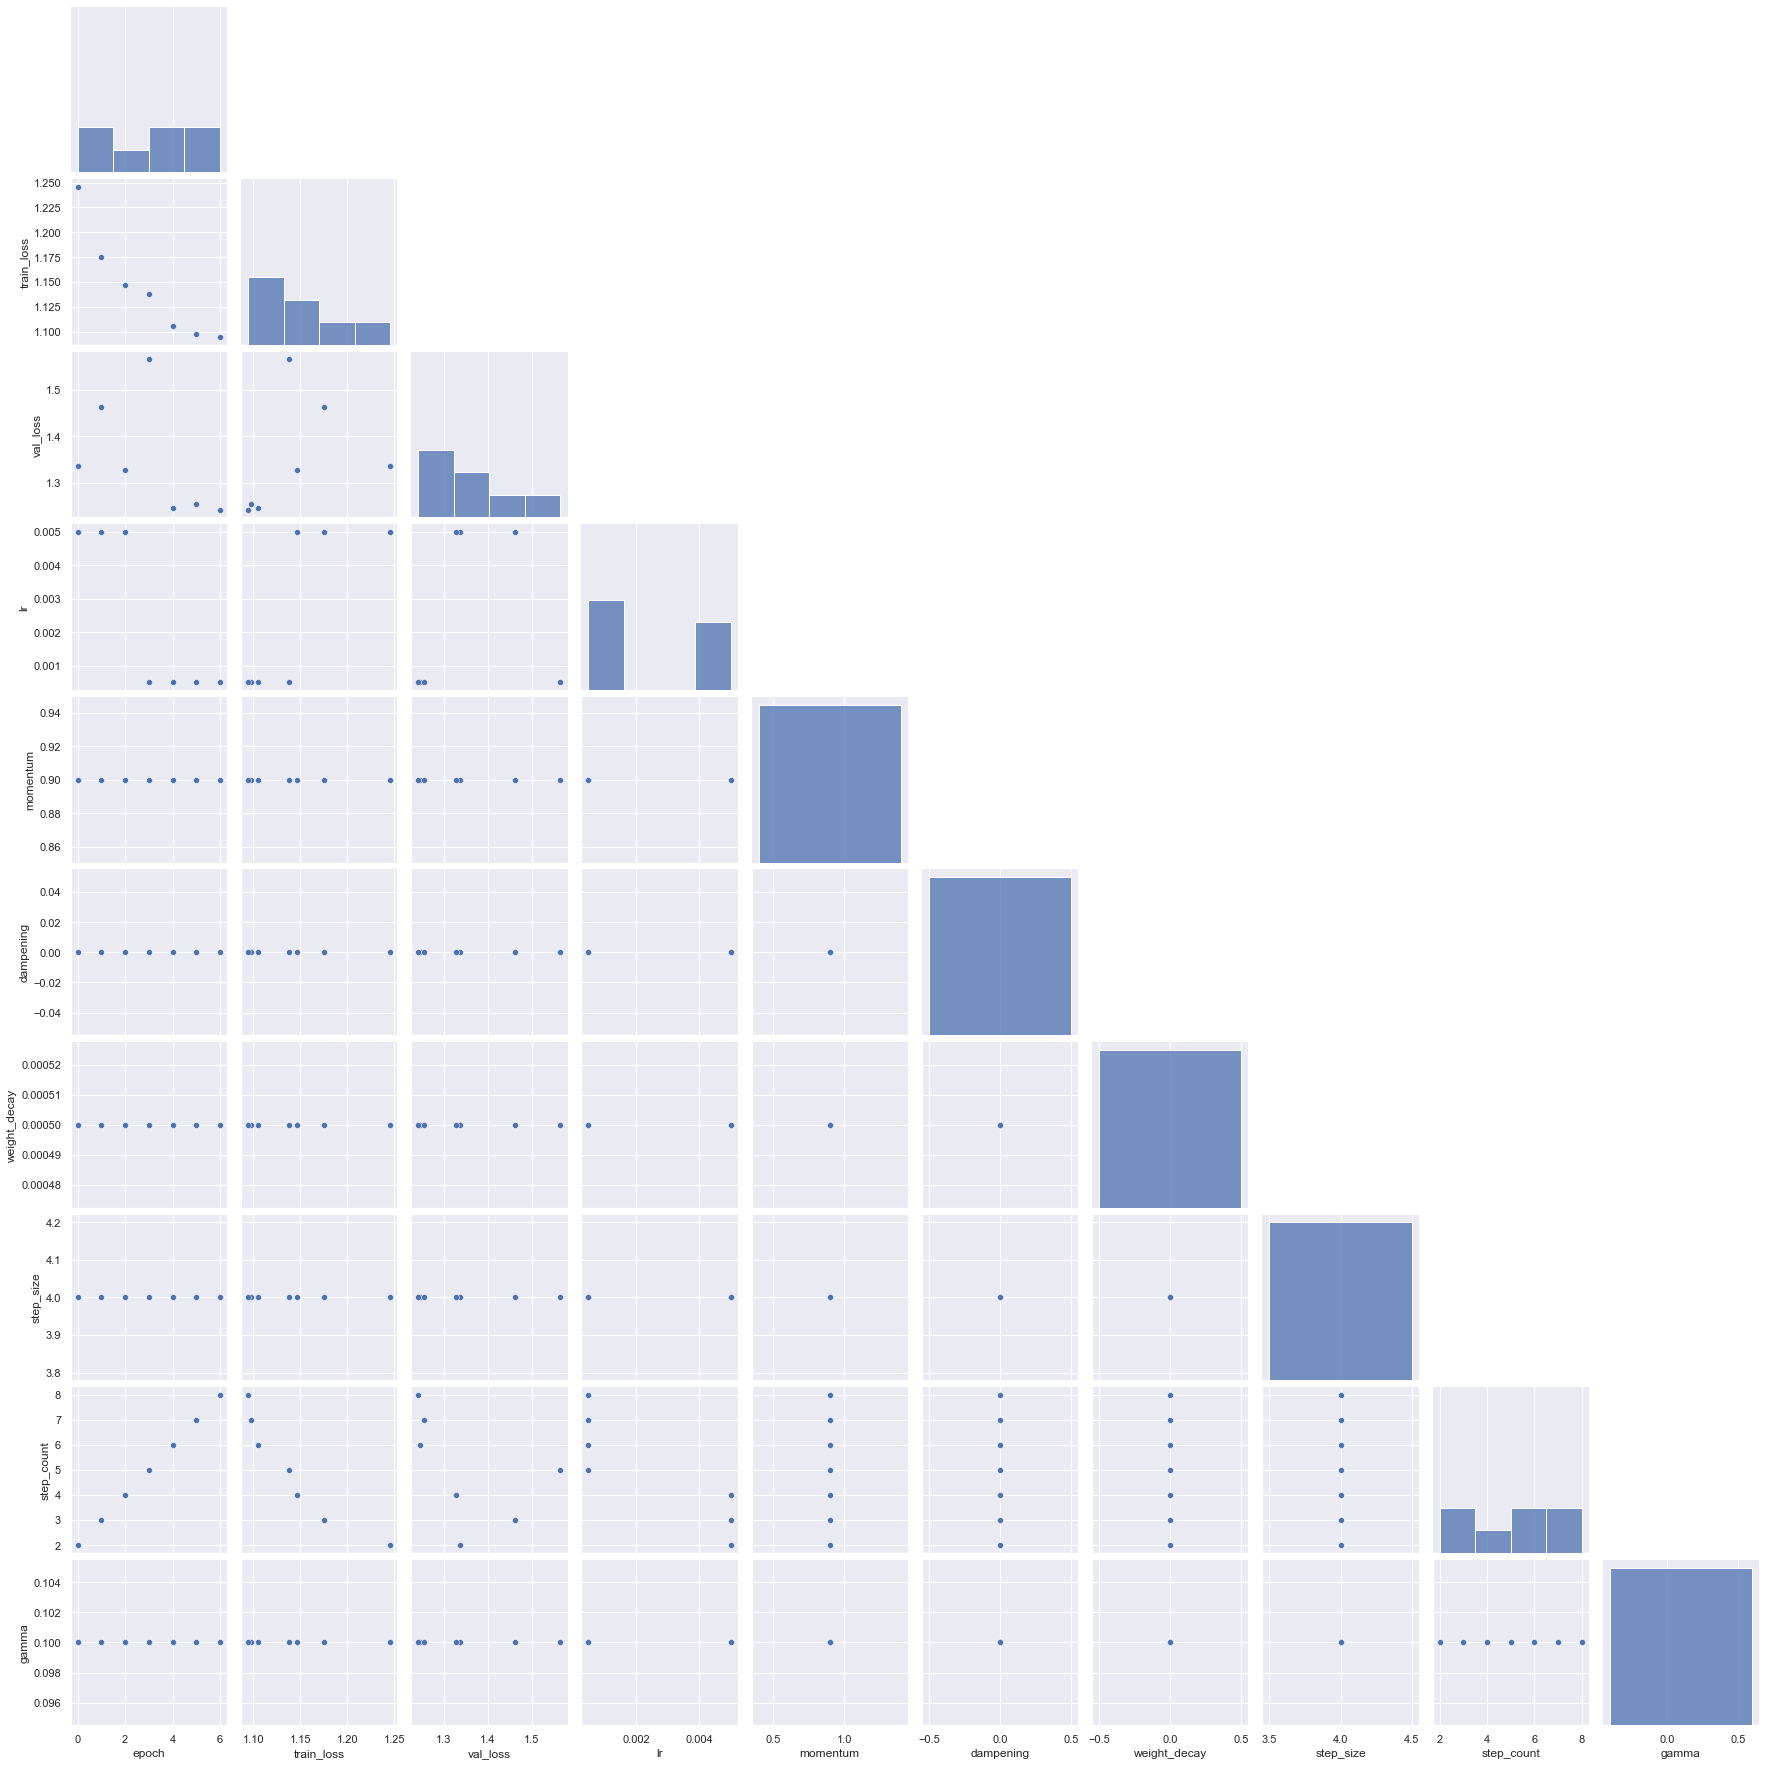

In [26]:
# init plot
sns.set(rc={"figure.figsize":(20, 10)})
sns.pairplot(data=zero_df, corner=True)
plt.show()

# Learning Rate

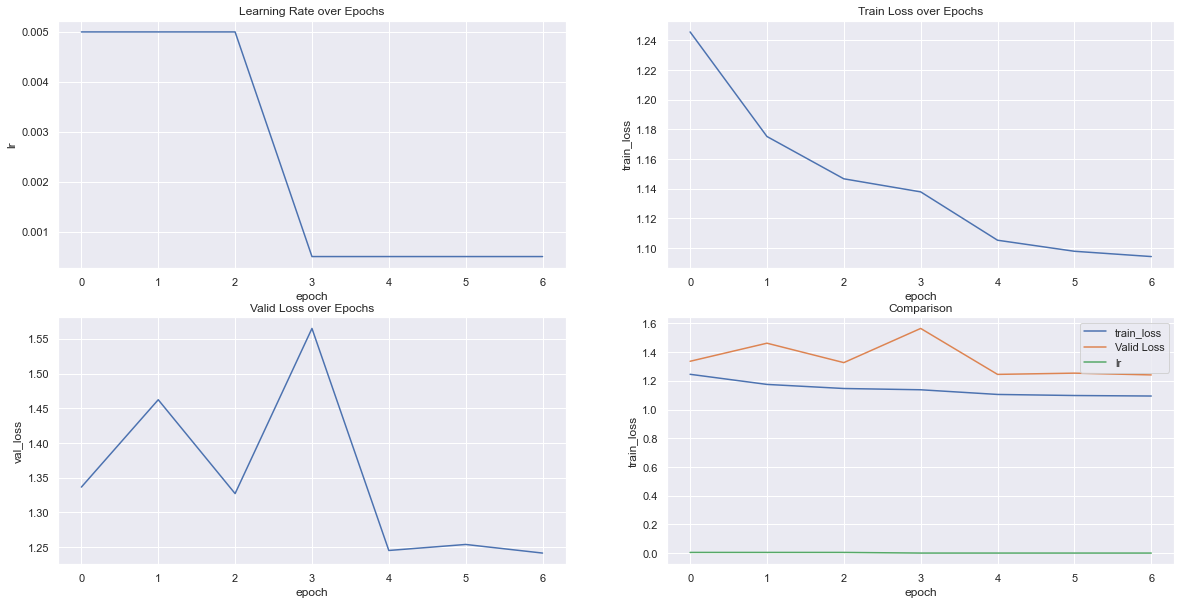

In [28]:
fig, axs = plt.subplots(2, 2)
# individual
sns.lineplot(data=zero_df, x='epoch', y='lr', ax=axs[0, 0]).set(title='Learning Rate over Epochs')
sns.lineplot(data=zero_df, x='epoch', y='train_loss', ax=axs[0, 1]).set(title='Train Loss over Epochs')
sns.lineplot(data=zero_df, x='epoch', y='val_loss', ax=axs[1, 0]).set(title='Valid Loss over Epochs')
# combined
sns.lineplot(data=zero_df, x='epoch', y='train_loss', ax=axs[1, 1], label='train_loss')
sns.lineplot(data=zero_df, x='epoch', y='val_loss', ax=axs[1, 1], label='Valid Loss')
sns.lineplot(data=zero_df, x='epoch', y='lr', ax=axs[1, 1], label='lr').set(title='Comparison')

plt.show()

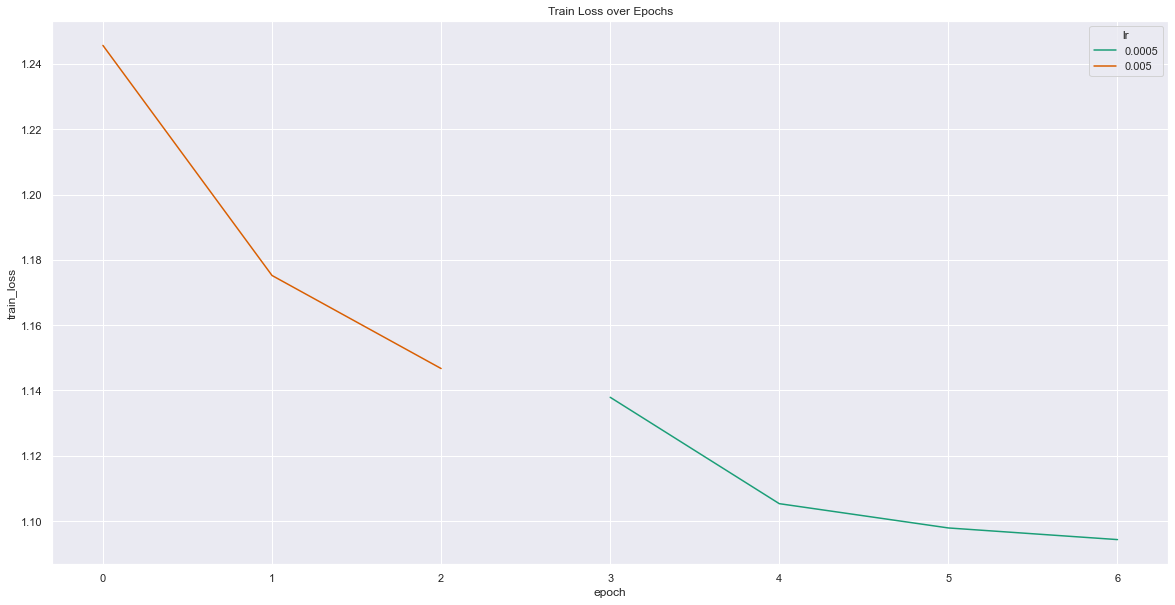

In [29]:
sns.lineplot(data=zero_df, x='epoch', y='train_loss', 
             hue='lr', palette='Dark2').set(title='Train Loss over Epochs')
plt.show()

# Iteration 1

This is interesting as iteration 1 has focal loss.

In [30]:
print_setup(one_obj)

model: EfficientNETB2
optim: SGD
loss: Focal Loss
scheduler: StepLR
train_samples: 4874
val_samples: 1218
device: GeForce GTX 970
train_pcent: 0.8
TRAIN_BS: 1
VALID_BS: 1
NB_EPOCHS: 7
model_name: EfficientNETB2
reshape_size: [800, 800]
num_classes: 4
seed: 69
val_fold: 4
save_path: C:\Users\Admin\Git\SIIM\models\EfficientNETB2\
final_train_loss: 0.5909527731187272
final_val_loss: 1.2670776421729513


In [31]:
print('Keys for loaded model: {}'.format(one_models[0].keys()))
print('*'*50)
print('Keys for optimiser: {}'.format(one_models[0]['optimizer_state_dict'].keys()))
print('*'*50)
print('Keys for scheduler" {}'.format(one_models[0]['scheduler_state_dict'].keys()))

Keys for loaded model: dict_keys(['model_state_dict', 'optimizer_state_dict', 'scheduler_state_dict', 'train_loss', 'val_loss', 'epoch'])
**************************************************
Keys for optimiser: dict_keys(['state', 'param_groups'])
**************************************************
Keys for scheduler" dict_keys(['step_size', 'gamma', 'base_lrs', 'last_epoch', '_step_count', 'verbose', '_get_lr_called_within_step', '_last_lr'])


In [32]:
# load df
one_df = model_epochs_dataframe(one_models)
one_df.head()

,epoch,train_loss,val_loss,lr,momentum,dampening,weight_decay,step_size,step_count,gamma
0,0,0.771852,1.271490,0.0050,0.9,0,0.0005,4,2,0.1
1,1,0.707552,1.154664,0.0050,0.9,0,0.0005,4,3,0.1
2,2,0.676399,1.093499,0.0050,0.9,0,0.0005,4,4,0.1
3,3,0.666416,1.148677,0.0005,0.9,0,0.0005,4,5,0.1
4,4,0.615928,1.268083,0.0005,0.9,0,0.0005,4,6,0.1


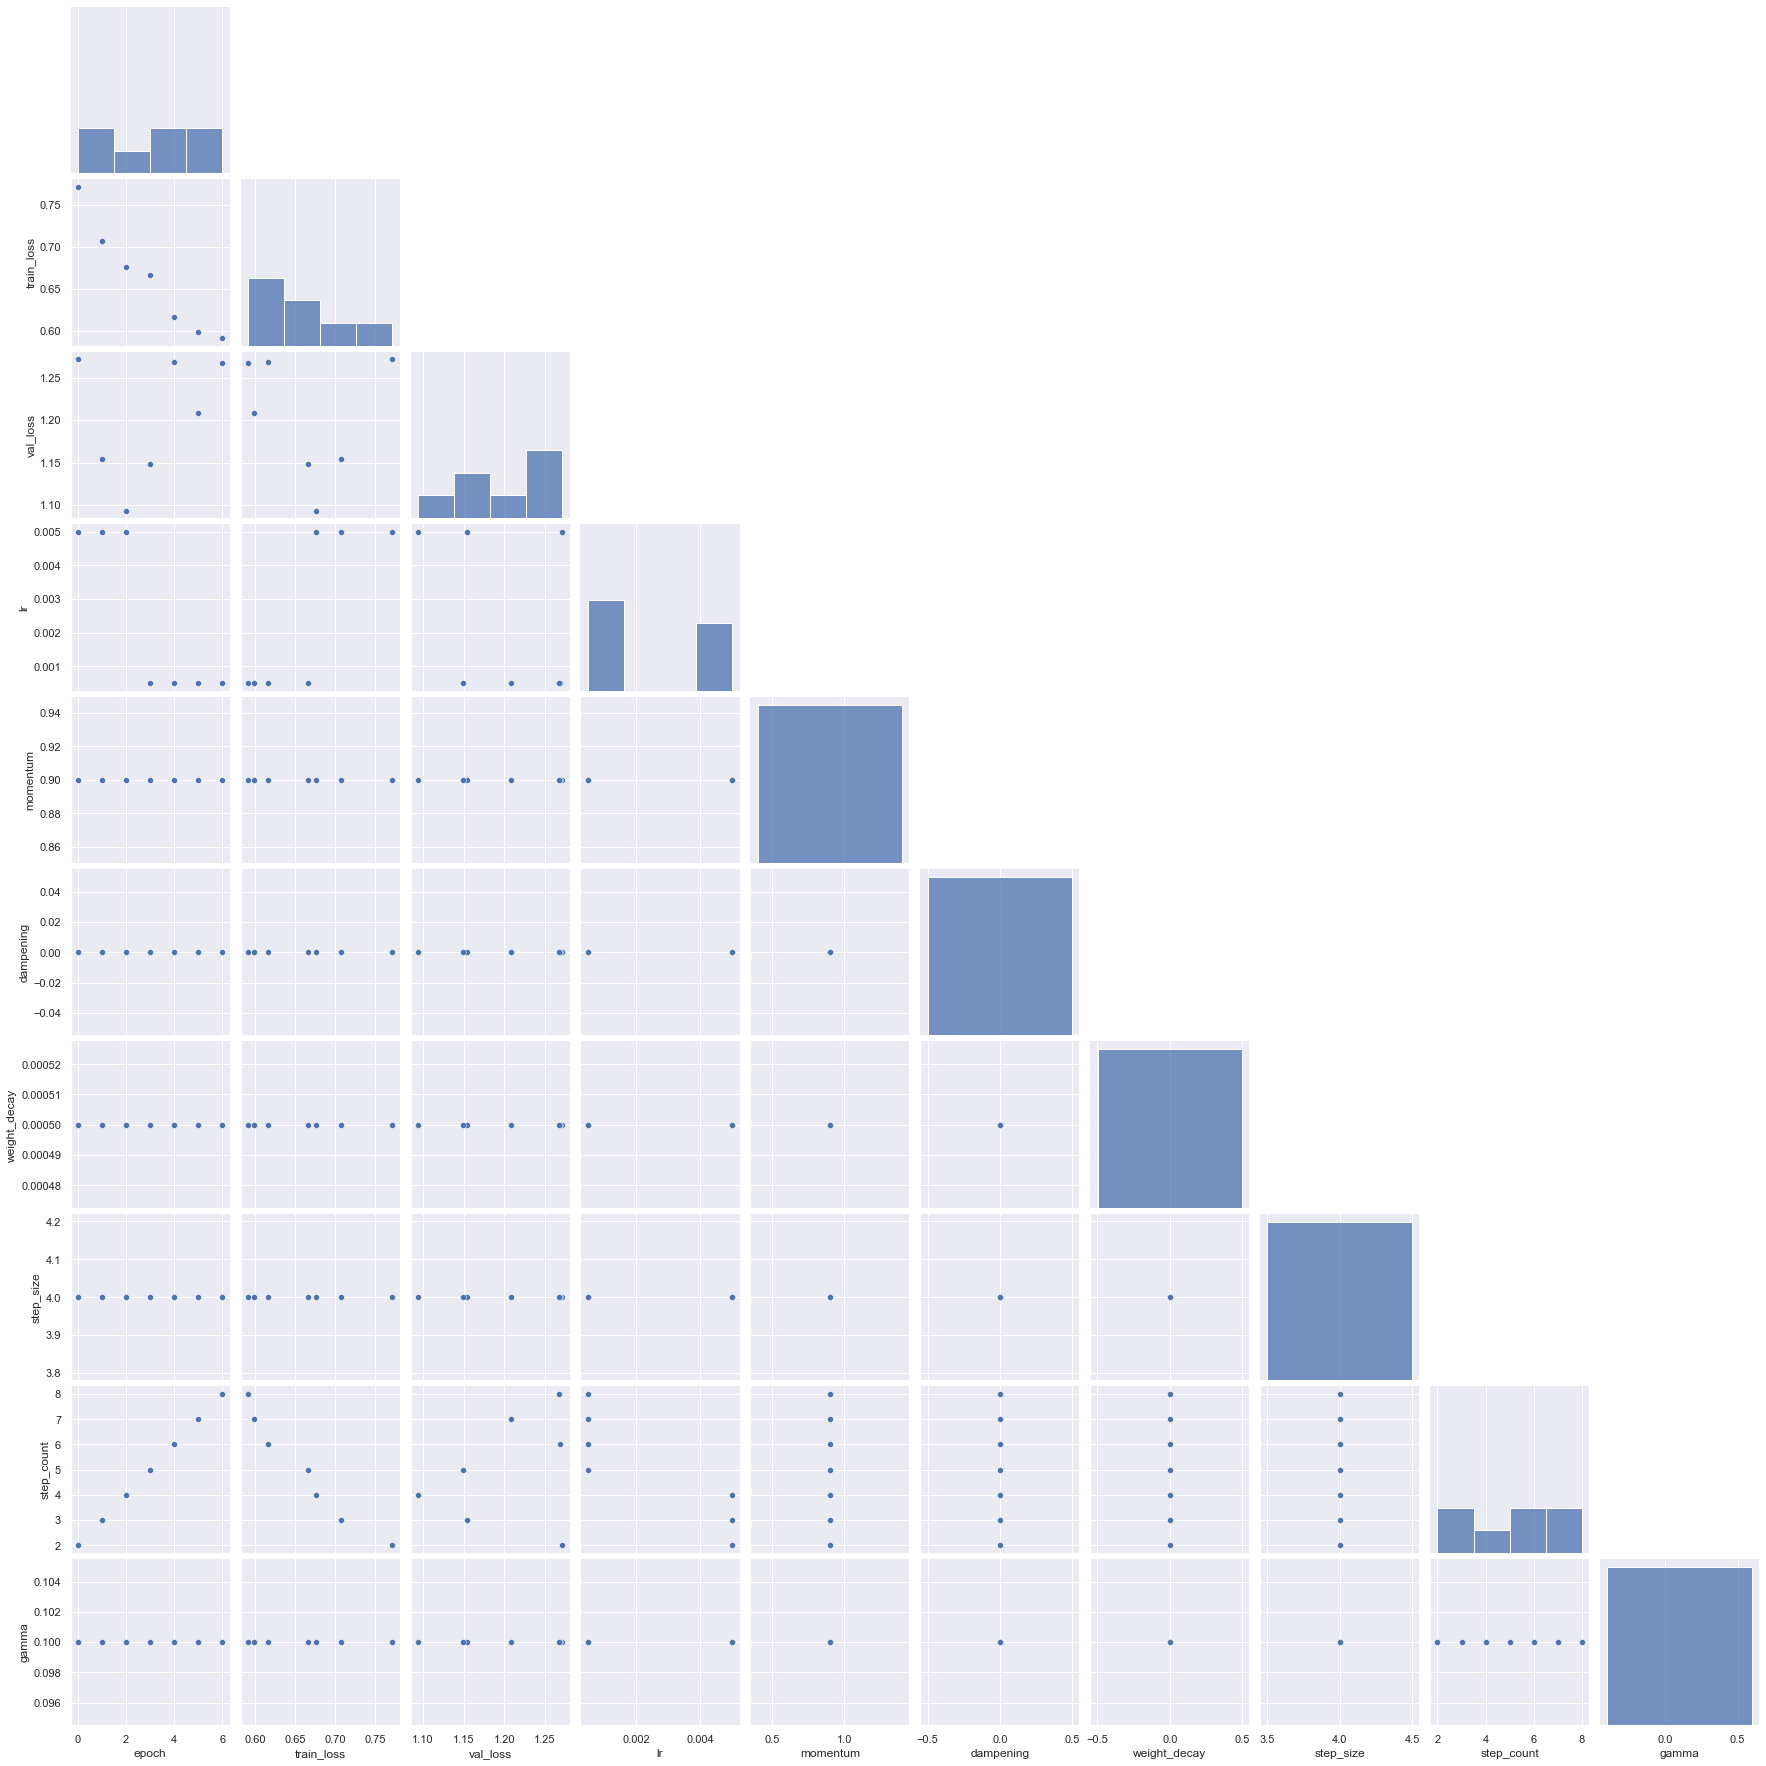

In [34]:
# init plot
sns.set(rc={"figure.figsize":(20, 10)})
sns.pairplot(data=one_df, corner=True)
plt.show()

# Learning Rate

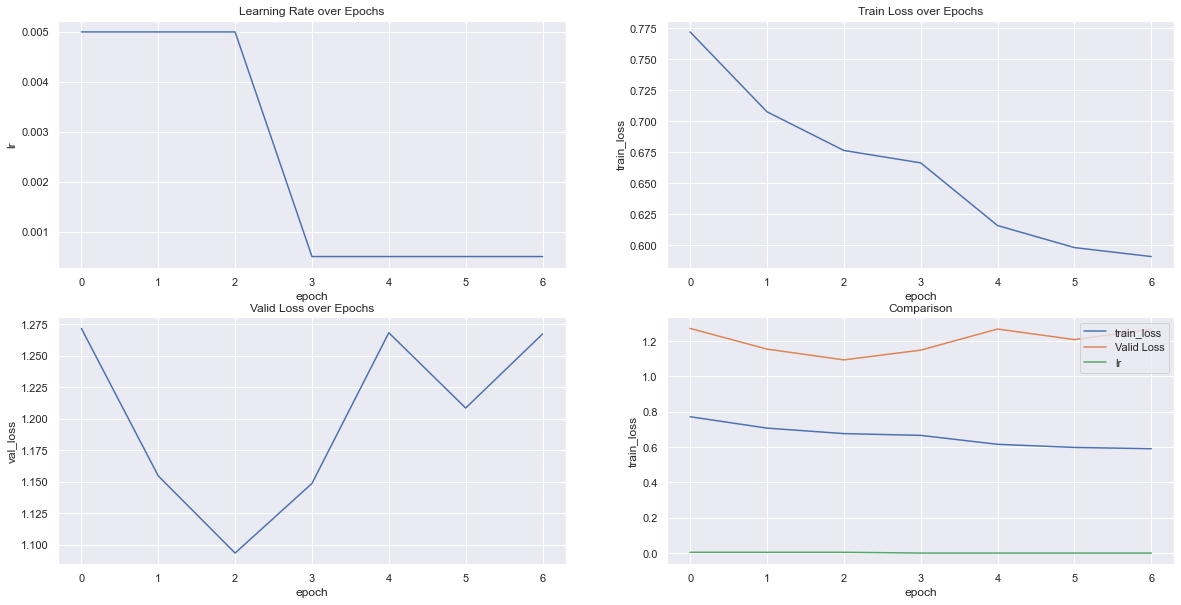

In [33]:
fig, axs = plt.subplots(2, 2)
# individual
sns.lineplot(data=one_df, x='epoch', y='lr', ax=axs[0, 0]).set(title='Learning Rate over Epochs')
sns.lineplot(data=one_df, x='epoch', y='train_loss', ax=axs[0, 1]).set(title='Train Loss over Epochs')
sns.lineplot(data=one_df, x='epoch', y='val_loss', ax=axs[1, 0]).set(title='Valid Loss over Epochs')
# combined
sns.lineplot(data=one_df, x='epoch', y='train_loss', ax=axs[1, 1], label='train_loss')
sns.lineplot(data=one_df, x='epoch', y='val_loss', ax=axs[1, 1], label='Valid Loss')
sns.lineplot(data=one_df, x='epoch', y='lr', ax=axs[1, 1], label='lr').set(title='Comparison')

plt.show()

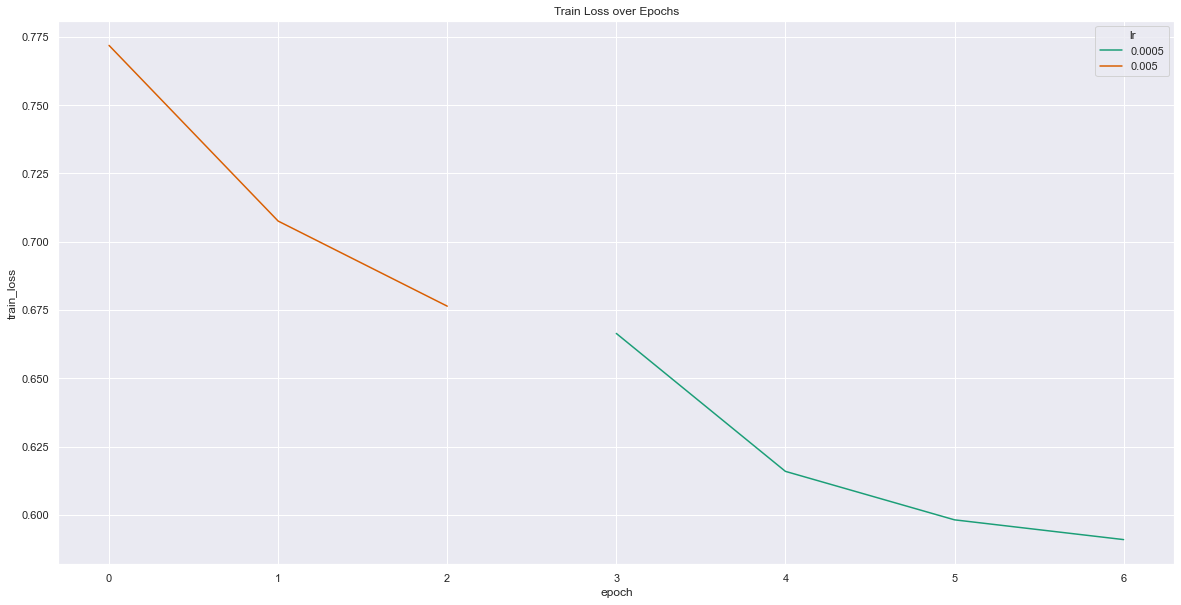

In [35]:
sns.lineplot(data=one_df, x='epoch', y='train_loss', 
             hue='lr', palette='Dark2').set(title='Train Loss over Epochs')
plt.show()

No conversion, re run with more epochs